# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments


The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
    

Wholesale customers dataset has 440 samples with 6 features each.


In [6]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [7]:
#Selecting three indices of choice  to sample from the dataset. We would like them to be as different as possible. So I choose indices which are at the extremes.
#That is, those who order a lot of delicatessen, those who spend a lot, those who spend a little

#Please run the below two lines for the first time
total_bill = data.sum(axis = 1)
data['total_bill'] = total_bill

#percentage of delicatessen
del_perc = data.Delicatessen/data.total_bill
#Max percentage of delicatessen
data.loc[del_perc.argmax()]
#One index - 372. Orders a lot of delicatessen

#Spends a lot. Choose a value close to the top, but not quite the top. 
#Second index - 211
data.total_bill.argsort().tail(10)
#Spends little

data.total_bill.argsort().head(10)

#Index - 203


data.loc[203]
data.loc[211]
data.loc[372]

indices = [203,211,372]


data
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_bill
0,583,685,2216,469,954,18,4925
1,12119,28326,39694,4736,19410,2870,107155
2,3884,3801,1641,876,397,4829,15428


**Comment on the samples:

When we look at the first sample(203), all the parameters are lower than the mean. This indicates that the establishment might be a small, lower-end shop, like a neighbourhood bodega. The second sample has values that are all well above the mean. This looks like a wholesale retailer. As for the third sample, I picked out a sample which has  a high percentage of delicatessen spending compared to the other spending. This suggests a shop selling foreign/prepared foods. 



**

### Implementation: Feature Relevance
Checking out how well each feature can be predicted by other features to look at relevance of each feature

In [10]:


#Here I drop each column, fit the model, compute the score, and compare scores

dropcol = ['Fresh', 'Milk','Grocery','Detergents_Paper','Delicatessen']
score_list = []

for col in dropcol:
    new_data = data.loc[:, data.columns != col]

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
    y = data[col]

    from sklearn.cross_validation import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set

    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()

    model = regressor.fit(X_train, y_train)

    preds = regressor.predict(X_test)


# Report the score of the prediction using the testing set
    score_list.append(model.score(X_test, y_test))



print(score_list)


[0.58116535216308829, 0.11216315296913304, 0.64304589659974987, 0.46871904408952159, -2.022285592502616]


Comment

We have the score_list above which looks like this - [-0.3482654312821436,
 0.21779529919254925,
 0.68611867145623129,
 0.36933252102181346,
 -1.6351891891345254]
 
 From the ordering, we can see that the Grocery feature has a high score, which means it can be easily predicted compared to the other features. So we can drop Grocery. 'Fresh; and 'Delicatessen' seem to be very important features since they have negative scores. 










**

### Visualize Feature Distributions
Here I try to visualize the distribution of the features

C:\Users\Madhu\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


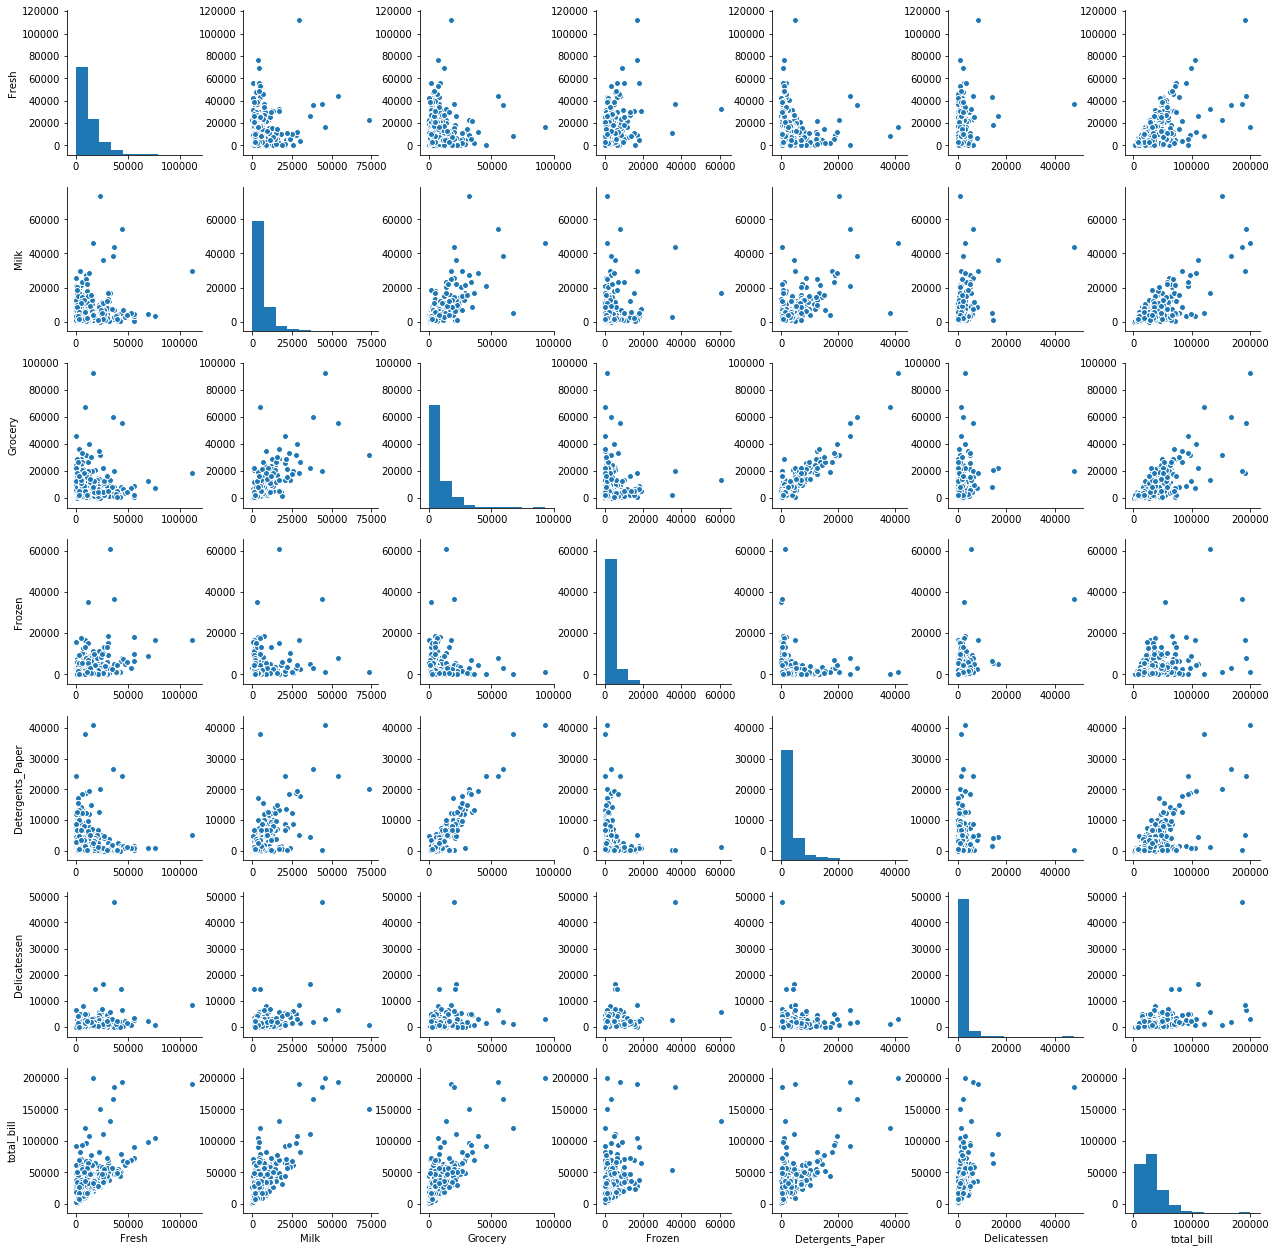

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
import scipy.stats as stats

#Another thing to do is produce a pairplot using seaborn, essentially the same concept

%matplotlib inline

sns.pairplot(data)

# We can see that groceries are highly correlated with detergents and paper as well as milk. So it can be eliminated as a feature

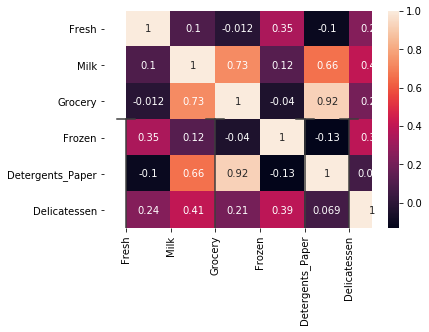

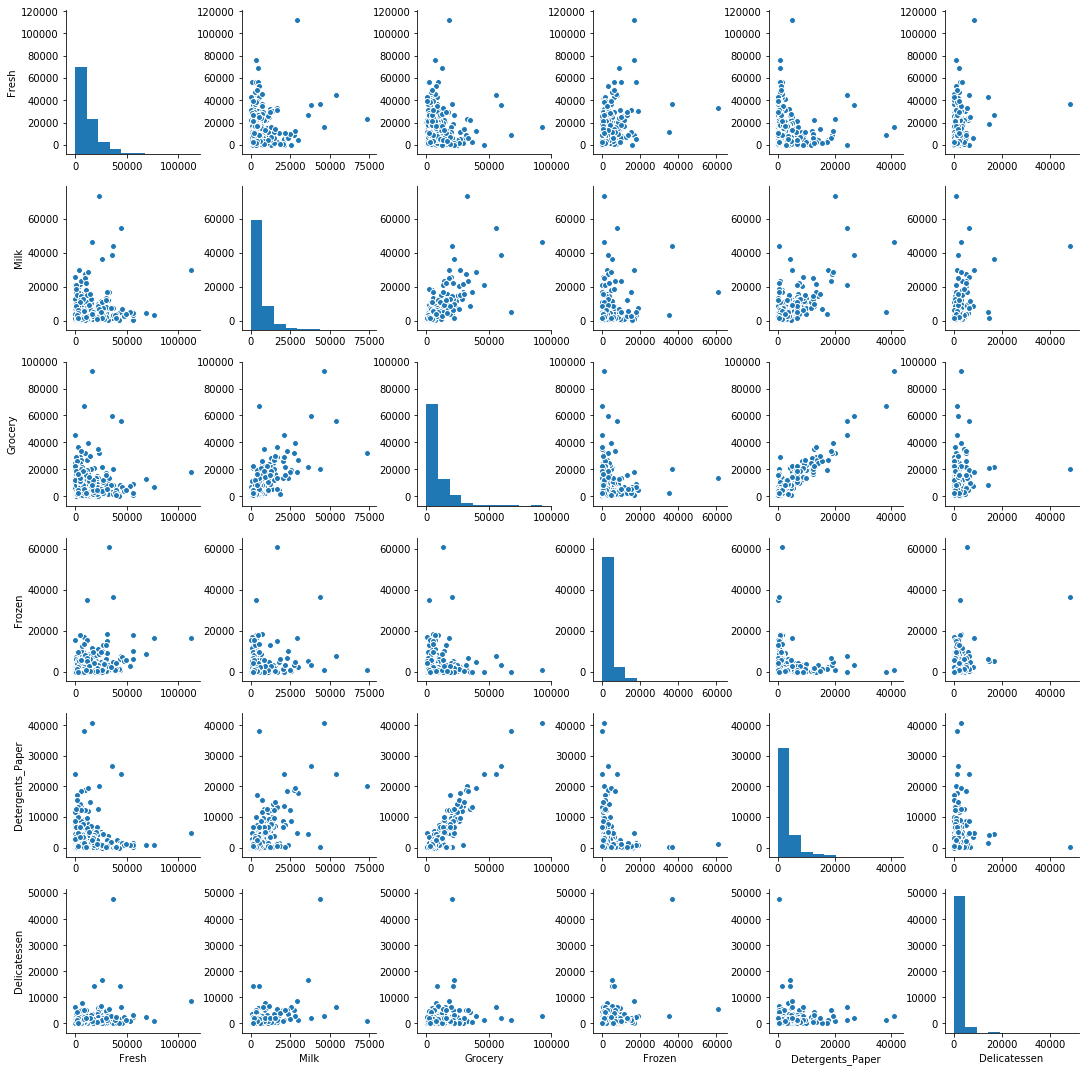

In [375]:
#Heatmap to check correlation of features
sns.heatmap(data.corr(), annot = True)

#To check normality of data distribution

stats.normaltest(data['Frozen'])

#Outliers
#Can be visualized through box plots
sns.boxplot(data = data)

#Plotting pairplot

sns.pairplot(data)

1)Using the scatter matrix and the heatmap as a reference, we can see that the feature 'grocery' is heavily correlated with Detergents_Paper, Milk. This confirms our suspicion earlier that this feature might be unnecessary. 
2)We can see from the kdes and the normaltest performed above that the data is not normally distributed
3)There are a few outliers, as evidenced in the box plots and scatter matrix.
4) As we can see from the histograms in the pairplots, most of the features have a large number of values close to zero. This is especially true for features like delicatessen, frozen. Features like Fresh, Milk, Grocery seem to have lesser values close to zero. However,the delicatessen and frozen distributions are sparse and would require a log transformation. 



## Data Preprocessing
Scaling and detecting outliers

### Implementation: Feature Scaling


C:\Users\Madhu\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


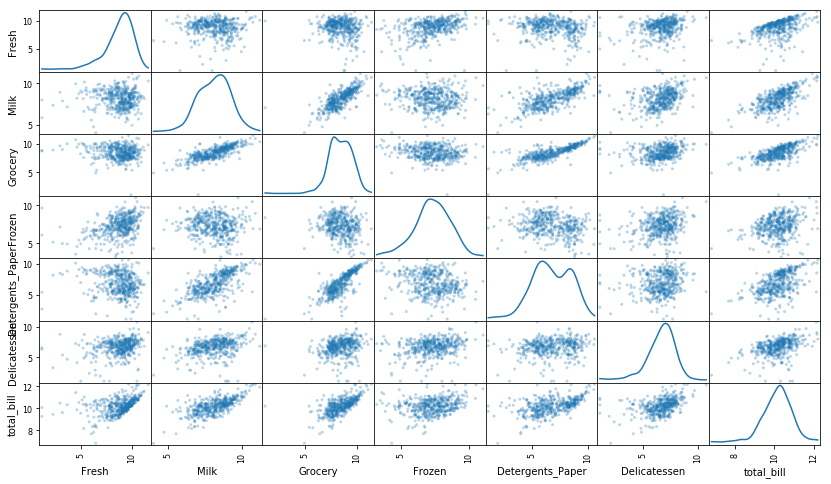

In [34]:
#  Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_bill
0,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372,8.502080
1,9.402530,10.251535,10.588955,8.462948,9.873544,7.962067,11.582032
2,8.264621,8.243019,7.403061,6.775366,5.983936,8.482395,9.643939


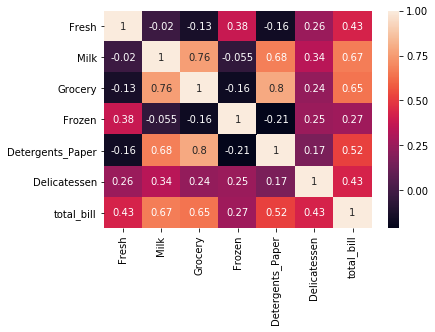

In [13]:
# Display the log-transformed sample data
display(log_samples)

sns.heatmap(log_data.corr(), annot = True)

#Yes the data does seem to be normally distributed now after the log transformation. To check whether the features are still correlated, we can
#look at the scatter matrix above. There still seems to be correlation amongst these features(grocery and detergent, grocery and milk), though not to the extent we had seen earlier. 

#When we plot the heatmap and study the correlations, the correlation between grocery,detergent and grocery, milk seem to be lesser, but are still significant.

### Implementation: Outlier Detection
Implementing outlier detection using Tukey's method

In [14]:
# For each feature find the data points with extreme high or low values

from collections import Counter
outlier_data_index = []
outlier_indices = []
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
  #  print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
     
    outlier_data_index = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    
    outlier_indices.extend(outlier_data_index)

# OPTIONAL: Select the indices for data points you wish to remove

counter = Counter(outlier_indices)

#Now counting points which have more than one outlier

multiple_outliers = list( k for k, v in counter.items() if v >= 2 )

outliers = multiple_outliers

print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[multiple_outliers]).reset_index(drop = True)




[128, 154, 65, 66, 75, 86, 98, 355, 183]


**The indices [128, 154, 65, 66, 75] have outliers in more than one feature. I think if there are outliers in multiple categories, those data points should be removed. Having outliers this way in multiple categories means that while forming clusters, the k-means algorithm would consider the outlier as a mean to minimize loss. This would mess up implementation of the algorithm. This is why I think outliers in multiple categories should be removed, as it is not representative of general customer data..**

## Feature Transformation

Using PCA to draw conclusions behind the distribution of underlying data

### Implementation: PCA

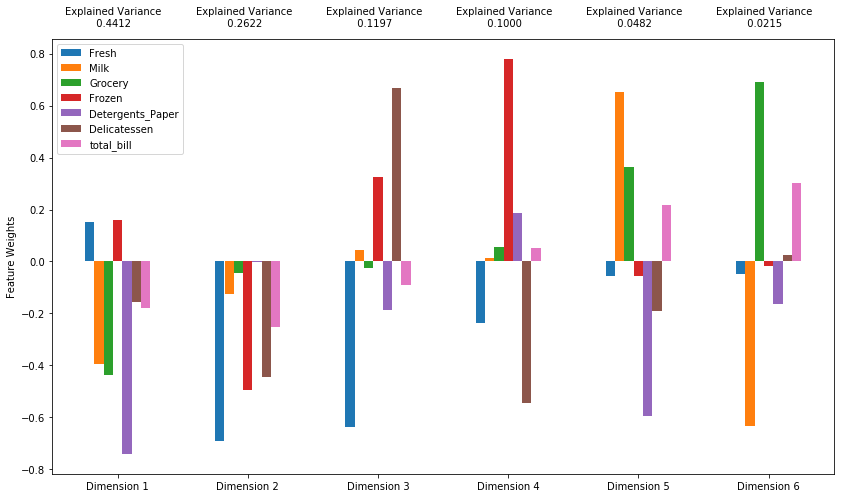

In [15]:
# Apply PCA by fitting the good data with the same number of dimensions as features


from sklearn.decomposition import PCA

pca = PCA(n_components= 6)

pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)



**Observations: 1)The amount of variance explained in total by the first and second component is 70.68%. 2) By the first four principal components, the amount of variance explained is 93.11%.
Dimension:

1) Dimension 1: The variance explained by this dimension is 44.3%. It can be seen that the detergents and paper feature is heavily represented by this dimension and has a large negative loading. This explains a large proportion of the negative variance in the data. Milk and Grocery features are also well explained by this dimension. 

2) Dimension 2 : It has all negative loadings. It very heavily represents the 'Fresh' feature.

3) Dimension 3: Delicatessen and Fresh features are well represented here. 

4) Dimension 4: The 'Frozen' feature is well represented by this dimension. 


Overall the first four dimensions seem to explain most of the features of the data really well. Features like fresh, delicatessen and frozen are well captured by the PCA technique.


**

### Observation


In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.2669,4.5873,-1.2924,1.5775,-0.7922,0.0003
1,-4.2122,-2.2733,0.1517,0.8386,0.2942,0.0405
2,0.6723,-0.0057,1.5738,-1.5176,-0.2183,-0.7540


### Implementation: Dimensionality Reduction

In [17]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

pca.fit(good_data)

#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Looking at how the log transformed sample data has changed after PCA

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.2669,4.5873
1,-4.2122,-2.2733
2,0.6723,-0.0057


## Visualizing a Biplot
A BiPlot

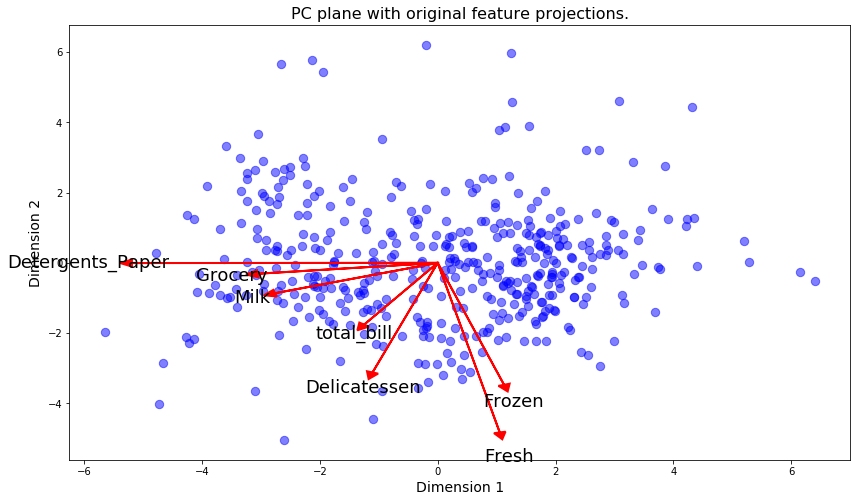

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observations from the BiPlot

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


Answer: From the biplot, the detergent feature correlates mostly with the first component. As for the second component, fresh seems to be closely correlated. These observations agree with the pca results we had observed earlier.

## Clustering

Pros and cons of using K-means clustering vs GMM for this data

** Notes on both techniques

Kmeans clustering:

*Partitions the dataset into hard clusters. So it is much easier to understand and implement. It also works well and quickly in practice. However it is computationally intensive to calculate Euclidean distances. Also, the algorithm is  much influenced by outliers. 

Gaussian Mixture Model:

*Soft clustering algorithm. Advantage is that it provides a lot of flexibility and allows for mixed memberships of points.Due to this reason, I think this algorithm would be more appropriate for our dataset since there is no clear demarcation of groups that customers must belong to. 

**

### Implementation: Creating Clusters

In [20]:


from sklearn import mixture
from sklearn.metrics import silhouette_score



def silhouette_scorer_print(clusters):
    clusterer = mixture.GaussianMixture(n_components=clusters, covariance_type='full').fit(reduced_data)


    preds = clusterer.predict(reduced_data)


    centers = clusterer.means_


    sample_preds = clusterer.predict(pca_samples)


    score = silhouette_score(reduced_data, preds)

    print(score)
    
    
for clusters in range (2,11):
    print('Number of clusters: {}'. format(clusters))
    silhouette_scorer_print(clusters)

    
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

best_gmm

Number of clusters: 2
0.420829742695
Number of clusters: 3
0.388918900626
Number of clusters: 4
0.305435057979
Number of clusters: 5
0.320207219577
Number of clusters: 6
0.249497540509
Number of clusters: 7
0.324326098659
Number of clusters: 8
0.346471975209
Number of clusters: 9
0.315881362898
Number of clusters: 10
0.336296898086


GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

### Optimal number of clusters

**
The silhouette scores are:

Number of clusters: 2
0.421916846463
Number of clusters: 3
0.331895750346
Number of clusters: 4
0.279418317506
Number of clusters: 5
0.33167612346
Number of clusters: 6
0.331998704101
Number of clusters: 7
0.316894157505
Number of clusters: 8
0.294921130328
Number of clusters: 9
0.292211237166
Number of clusters: 10
0.326600995065

The number of clusters = 2 has the best silhouette score




**

### Cluster Visualization


In [21]:
clusterer =mixture.GaussianMixture(n_components=2, covariance_type='full').fit(reduced_data)

#  Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

#  Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


clusterer.means_

array([[-2.19498203,  0.36453648],
       [ 1.2848238 , -0.21337995]])

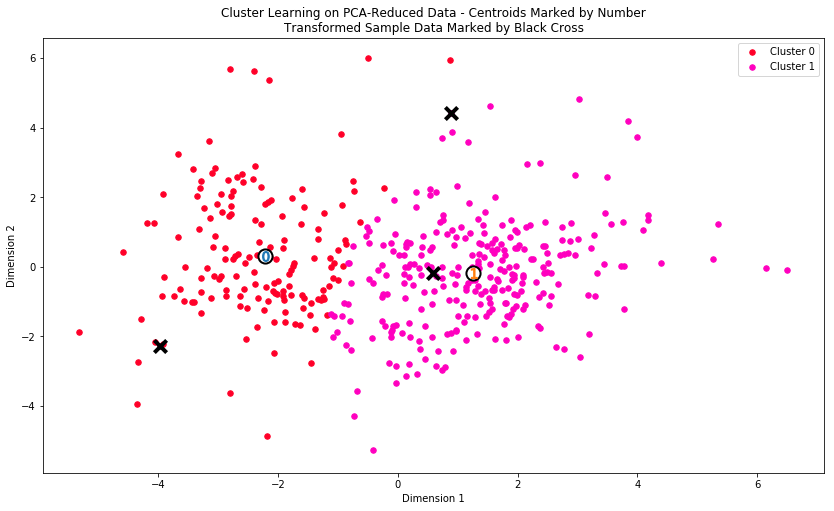

In [414]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery



In [26]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)







,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_bill
Segment 0,3612.0,7682.0,12092.0,889.0,4589.0,970.0,35735.0
Segment 1,9083.0,2094.0,2717.0,2072.0,348.0,724.0,22226.0


In [29]:
mean_values = data.mean(axis = 0)

**

Segment 0: Below average ( median ) spending on delicatessen, Fresh and Frozen. Above average on Detergents, paper, grocery and milk. This could represent categories like a small grocery store, or small cafes.

Segment 1: Above median spending on Frozen and Fresh. Could be markets like meat markets. 



**

In [31]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer: Sample point 1: Segment 1 best represents it. This includes large retailers, markets etc. So Segment 1 is a good fit. As we can see, the predictions indicate this too.  For Sample point 2:This includes small grocery shops and so on. This is best represented by Segment 0. The predictions indicate this too. Sample point 3 seems to be better represented by Segment 1. The predictions represent this too**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.


How do we conduct A/B testing using this data?

**The change will not affect all customers equally. My belief is that customers in the 2 segments from above will react differently. For example, large retailers might want  delivery 5 days and may be willing to pay for it but small cafes might be happier with a cheaper 3 days delivery. So we can poll a sample of each segment and choose the results to be representative of tha segment.
Segment 0:

These people purchase milk, detergents and paper and Grocery. This may not be affected by this change as these items are non-perishable. So they might be okay with change in service

Segment 1:

These people purchase a huge quantity of fresh. So they might impacted adversely.


So to find results, we need to have a testing and control group for each segment, introduce the change for the testing groups, and then study the satisfaction and spending across the testing and control groups in each segment.

**

Further uses of this data

**A supervised learning algorithm could be trained on the customer data which already has the cluster labels, and the new customer information would serve as the test data. The target variable is the customer segment or the cluster number in this case. We can also compare these clusters to the channel data in the above repository to study if the results look good**